In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 

Found GPU at: 
2.2.0


In [3]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [74]:
from IPython.display import clear_output

In [14]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [6]:
folder= "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part1"
files= glob( os.path.join( folder, "*.jpg"))

In [8]:
len( files)

410

In [10]:
img= cv2.imread( files[0])

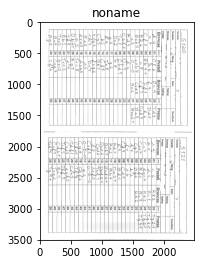

In [12]:
show_image( img)

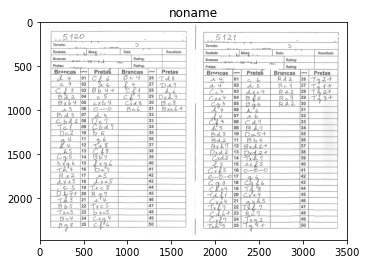

In [15]:
img= cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
show( img)

In [16]:
img.shape

(2480, 3504, 3)

In [26]:
int(img.shape[0])

2480

In [58]:
#
# parte 1 - faz split da imagem original e gera um arquivo para cada jogada
#

count= 1;
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted"
def split( img):
#     print( img.shape) #esperado (2480, 3504, 3)
    h= 2230+50
    w= 1545+10
    
    img1= img[100:100+h, 115:115+w]
    img2= img[110:110+h, 1845:1845+w]
    
    # esperado 
    return img1, img2

def split_and_save( tag, file):
    global count
    img= cv2.imread( file)
    img= cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img1, img2= split( img)
    
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_L_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img1)
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_R_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img2)
    if( count%100== 0 or count%100== 1):
        print( count, "...")
    
for tag,folder in [
    ("part1", "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part1"),
    ("part2", "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part2"),
    ("part3", "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part3")]:
    
    files= glob( os.path.join( folder, "*.jpg"))
    for f in files:
        split_and_save( tag, f)

101 ...
201 ...
301 ...
401 ...
501 ...
601 ...
701 ...
801 ...
901 ...
1001 ...
1101 ...
1201 ...
1301 ...
1401 ...
1501 ...
1601 ...
1701 ...
1801 ...
1901 ...
2001 ...
2101 ...
2201 ...
2301 ...
2401 ...
2501 ...
2601 ...


In [80]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13633 sha256=6c5cdb56647d87eac6e2928f61118efd1c7a9733636a0c8a166faba5d66137de
  Stored in directory: c:\users\hayashi\appdata\local\pip\cache\wheels\be\c9\54\c3a5693600be95ece493b981ae104c94e1a2c4d3e434438810
Successfully built pytesseract


You should consider upgrading via the 'C:\venv\mestrado\Scripts\python.exe -m pip install --upgrade pip' command.


In [86]:
import time

In [106]:
import pytesseract

In [131]:
import shutil

In [114]:
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR"'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

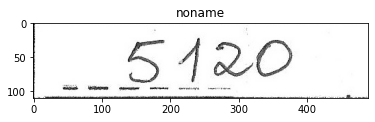

In [110]:
show( img)

In [117]:
pytesseract.image_to_string(img)

'| 5420 —\n\x0c'

In [132]:
files= glob( os.path.join( output_folder, "9999*.jpg"))


In [133]:
files[0]

'C:/mestrado/datasets/handmade/imagens-originais/all_splitted\\9999_0989_L_part2_scan0084.jpg'

In [134]:
shutil.move( files[0], 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')

'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold\\9999_0989_L_part2_scan0084.jpg'

In [137]:
#
# passo 2, identifcar o numero
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (5,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()

files= glob( os.path.join( output_folder, "9999*.jpg"))
k= len( files)
for f in files:
    clear_output()
    if n is None or len( n)<= 0:
        print( "Movido para _hold")
    else:
        print( 'Salvo como', ofile)
    img= cv2.imread( f)
    img= img[10:240,10:800]
    print( k, f)
    k-= 1
    showbig( img)
#     print( 'tesseract=>',pytesseract.image_to_string(img))
    n= input()
    if n is None or len( n)<= 0:
        print( "None informado. move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')
        time.sleep( 1)
    elif n=='x':
        print( 'bye!')
        break
    else:
        ofile= f.replace( '9999', n.zfill(4)) 
        os.rename( f, ofile)
        print( 'Salva como ', ofile)

In [154]:
#
# passo 3, renomear para 4 digitos no primeiro bloco
#
files= glob( os.path.join( output_folder, "*.jpg"))
k= len( files)
for f in files:
    p= Path( f)
    t= p.name.split( '_')[0]
    q= t.zfill(4)+'_'
    newf= f.replace( t+'_', q)
    if( newf != f):
        print( f, '=>', newf)
        os.rename( f, newf)

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\101_0429_L_part1_scan0217.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0101_0429_L_part1_scan0217.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\102_0430_R_part1_scan0217.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0102_0430_R_part1_scan0217.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\103_0103_L_part1_scan0054.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0103_00103_L_part1_scan0054.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\104_0104_R_part1_scan0054.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0104_00104_R_part1_scan0054.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\105_0427_L_part1_scan0216.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0105_0427_L_part1_scan0216.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\106_042

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\197_0546_R_part1_scan0275.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0197_0546_R_part1_scan0275.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\198_0543_L_part1_scan0274.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0198_0543_L_part1_scan0274.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\199_0544_R_part1_scan0274.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0199_0544_R_part1_scan0274.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\19_0530_R_part1_scan0267.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0019_0530_R_part1_scan0267.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\1_0469_L_part1_scan0237.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0001_0469_L_part0001_scan0237.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\200_0541_

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\288_0607_L_part1_scan0306.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0288_0607_L_part1_scan0306.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\288_0734_R_part1_scan0369.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0288_0734_R_part1_scan0369.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\289_0608_R_part1_scan0306.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0289_0608_R_part1_scan0306.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\289_0731_L_part1_scan0368.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0289_0731_L_part1_scan0368.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\28_0440_R_part1_scan0222.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0028_0440_R_part1_scan0222.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\290_0605_L

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\374_0712_R_part1_scan0358.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0374_0712_R_part1_scan0358.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\375_0701_L_part1_scan0353.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0375_0701_L_part1_scan0353.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\376_0702_R_part1_scan0353.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0376_0702_R_part1_scan0353.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\377_0321_L_part1_scan0163.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0377_0321_L_part1_scan0163.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\378_0322_R_part1_scan0163.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0378_0322_R_part1_scan0163.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\379_0319_

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\480_0167_L_part1_scan0086.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0480_0167_L_part1_scan0086.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\481_0168_R_part1_scan0086.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0481_0168_R_part1_scan0086.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\482_0755_L_part1_scan0380.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0482_0755_L_part1_scan0380.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\483_0756_R_part1_scan0380.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0483_0756_R_part1_scan0380.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\48_0456_R_part1_scan0230.jpg => C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0048_0456_R_part1_scan0230.jpg
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\4_0472_R_p

In [ ]:
from shutil import copyfile

In [ ]:
#
# passo 3.1 - limipar fullpage
#

In [217]:
files= glob( os.path.join( output_folder, "*.jpg"))
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
lines= open( pgnfile)
lines10k= [next(lines) for x in range( 10000)]

prev C:/mestrado/datasets/handmade/imagens-originais/all_splitted\6818_1273_L_part3_scan0035.jpg
prev ['e4', 'c5', 'Nc3', 'e6']


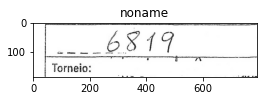

----------------
1 1658 C:/mestrado/datasets/handmade/imagens-originais/all_splitted\6819_1274_R_part3_scan0035.jpg
['e4', 'd5', 'exd5', 'Nf6']


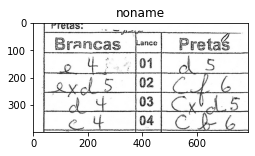

In [240]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (4,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    print( 'prev', _lab)
    if hold:
        print( "Movido para _hold =>", Path(hold).name)
        
    # ---
    n= int( Path( f).name.split( '_')[0])
    # o pgn (n-1)
    lnlabel= lines10k[n-1][8:len(lines10k[n-1])-1]

    img= cv2.imread( f)
    showbig( img[10:200,10:800])
    
    # extrai as primeireas 2 jogadas (para por no nome)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    print( lnlabel.split()[0:4])
    _lab= lnlabel.split()[0:4]

    showbig( img[400:800,10:800])
#     showbig( img[(img.shape[0]-200):img.shape[0],(img.shape[1]-800):img.shape[1]])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')
#         time.sleep( 1)

prev C:/mestrado/datasets/handmade/imagens-originais/all_splitted\6818_1273_L_part3_scan0035.jpg
----------------
1 2583 C:/mestrado/datasets/handmade/imagens-originais/all_splitted\6819_1274_R_part3_scan0035.jpg


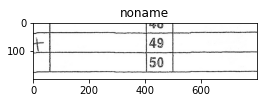

In [244]:
#
# pass 3.2 limpar os que estao com a parte inferir cortado
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (4,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted"
files= glob( os.path.join( output_folder, "*.jpg"))
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    if hold:
        print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
    img= cv2.imread( f)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    showbig( img[(img.shape[0]-200):img.shape[0],(img.shape[1]-800):img.shape[1]])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')


In [ ]:
#
# passo 4 - Criar arquivo de label para cada um dos arquivos
# 

In [193]:
imagesdir= 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted'
dest_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired/images_full'
dest_labeldir= 'C:/mestrado/datasets/handmade/imagens-originais/paired/labels'

pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
lines= open( pgnfile)
lines10k= [next(lines) for x in range( 10000)]

files= glob( os.path.join( output_folder, "*.jpg"))

In [194]:
print( len( files))

2599


In [216]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
count= 1
for f in files[0:20]:
    print( f)
    if count%10== 0:
        print( count)
    count+= 1
    # o numero da jogada..
    n= int( Path( f).name.split( '_')[0])

    # o pgn (n-1)
    lnlabel= lines10k[n-1][8:len(lines10k[n-1])-1]

    # extrai as primeireas 2 jogadas (para por no nome)
    h= ''.join( list( map( lambda x: x.ljust( 4, '_'), lnlabel.split()[0:4])))
    
    # nome do arquivo
    fname= h+Path( f).name

    # fullpath
    imgpath= os.path.join( dest_imgdir, fname)
    labpath= os.path.join( dest_labeldir, fname).replace( '.jpg', '.pgn')

    # salva aquivo de label
    print( 'label', labpath)
    write_label( labpath, lnlabel)
    # copia arquivo da imagem
#     print( 'image', imgpath)
    shutil.copyfile( f, imgpath)
    
#     print( lnlabel)
#     showbig( cv2.imread( f))    
#     input()
#     clear_output()

C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0001_0469_L_part1_scan0237.jpg
label C:/mestrado/datasets/handmade/imagens-originais/paired/labels\d4__f5__Nf3_g6__0001_0469_L_part1_scan0237.pgn
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0002_0470_R_part1_scan0237.jpg
label C:/mestrado/datasets/handmade/imagens-originais/paired/labels\e4__c5__Nf3_d6__0002_0470_R_part1_scan0237.pgn
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0003_0471_L_part1_scan0238.jpg
label C:/mestrado/datasets/handmade/imagens-originais/paired/labels\d4__Nf6_Nf3_d5__0003_0471_L_part1_scan0238.pgn
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0004_0472_R_part1_scan0238.jpg
label C:/mestrado/datasets/handmade/imagens-originais/paired/labels\e4__c5__Nf3_g6__0004_0472_R_part1_scan0238.pgn
C:/mestrado/datasets/handmade/imagens-originais/all_splitted\0005_0473_L_part1_scan0239.jpg
label C:/mestrado/datasets/handmade/imagens-originais/paired/labels\e4__Nc6_d4__